In [140]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [141]:
def readVisitCSV(fn):
    df = pd.read_csv(fn)
    return df

def logFitFn(x, a, b):
    return a*np.log(x)+b

def polyFnOrd2(x, a, b, c):
    return a*x**2 + b*x + c

def expoFn(x, a, b, c):
    return a * np.exp(-b * x) + c

<AxesSubplot:title={'center':'COVID-19 Screening Visits 2020'}, xlabel='Date', ylabel='Visit Count'>

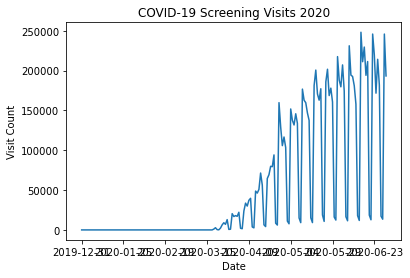

In [142]:
screenDf = readVisitCSV('screening_data.csv')
screenDf.plot(
    x='Date',
    y='Counts',
    legend=False,
    ylabel='Visit Count',
    title="COVID-19 Screening Visits 2020"
)



<AxesSubplot:title={'center':'Total Clinical Visits 2020'}, xlabel='Date', ylabel='Visit Count'>

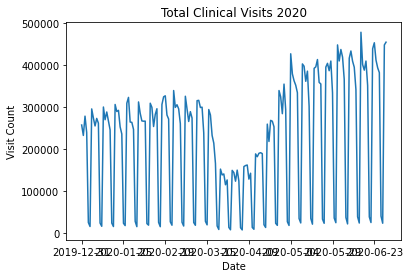

In [143]:
visitDf = readVisitCSV('visit_data.csv')
visitDf.plot(
    x='Date',
    y='Counts',
    legend=False,
    ylabel='Visit Count',
    title="Total Clinical Visits 2020"
)



<AxesSubplot:title={'center':'Rate of Screening Visits to Total Visits 2020'}, xlabel='Date', ylabel='Counts'>

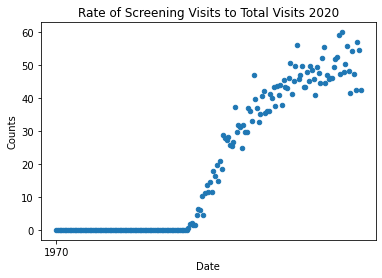

In [144]:
screenToVisitDf = screenDf.copy()
screenToVisitDf['Counts'] = screenDf['Counts']*100/visitDf['Counts']
screenToVisitDf['Date'] = pd.to_datetime(screenToVisitDf.index)
screenToVisitDf.plot(
    x='Date',
    y='Counts',
    kind='scatter',
    legend=False,
    ylabel='% Screening Visits',
    title="Rate of Screening Visits to Total Visits 2020"
)

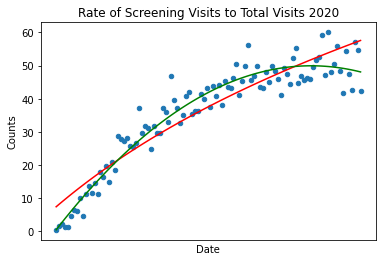

In [145]:
cleanedScreenRatioDf = screenToVisitDf[screenToVisitDf.Counts != 0]
xDate = cleanedScreenRatioDf['Date']
x = cleanedScreenRatioDf.index
y = cleanedScreenRatioDf['Counts']
popt, pcov = curve_fit(logFitFn, x, y)
perr = np.sqrt(np.diag(pcov))
yLogFit = logFitFn(x, *popt)

poly_popt, poly_pcov = curve_fit(polyFnOrd2, x, y)
yPolyFit = polyFnOrd2(x, *poly_popt)

expo_popt, expo_pcov = curve_fit(expoFn, x, y)
yExpoFit = expoFn(x, *expo_popt)

screeningPlot = cleanedScreenRatioDf.plot(
    x='Date',
    y='Counts',
    kind='scatter',
    legend=False,
    ylabel='% Screening Visits',
    title="Rate of Screening Visits to Total Visits 2020"
)
screeningPlot.plot(
    xDate,
    yLogFit,
    color='red'
)
screeningPlot.plot(
    xDate,
    yPolyFit,
    color='green'
)
